## Exploring job outcomes of students

This is a project exploring job outcomes of students. The original data on job outcomes was released by [American Community](https://www.census.gov/programs-surveys/acs/) Survey, which conducts surveys and aggregates the data. [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors) cleaned the dataset and released it on their Github repo. 

### Data Description

Here are some of the columns in the dataset:

* `Rank` - Rank by median earnings (the dataset is ordered by this column).
* `Major_code` - Major code.
* `Major` - Major description.
* `Major_category` - Category of major.
* `Total` - Total number of people with that major.
* `Sample_size` - Sample size (unweighted) of full-time.
* `Men` - Male graduates.
* `Women` - Female graduates.
* `ShareWomen` - Women as share of total.
* `Employed` - Number employed.
* `Median` - Median salary of full-time, year-round workers.
* `Low_wage_jobs` - Number in low-wage service jobs.
* `Full_time` - Number employed 35 hours or more.
* `Part_time` - Number employed less than 35 hours.

The complete list of columns can be viewed on [FiveThirtyEight's](https://github.com/fivethirtyeight/data/tree/master/college-majors) Github repo. 

### Analysis Questions

Through data exploration & visualization we aim to answer the following questions:

* *Do students in more popular majors make more money?*
* *How many majors are predominantly male? Predominantly female?*
* *Which category of majors have the most students?*

## Data Preparation

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0] # check first row

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Above, we have the view of our single row. We can observe our feature data and instance values. To get a better overall understanding Let's get familiar with our dataset.

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,BOTANY,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


The code above allows us to get a better feel for our dataset and get acquainted with it.

### Handling missing values

First, we need to handle missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [6]:
raw_data_count = recent_grads.shape[0] # row count
recent_grads.dropna(inplace=True) # drop rows with na
cleaned_data_count = recent_grads.shape[0] # row count after drop
print(raw_data_count, cleaned_data_count)

173 172


We can see that there was only one missing value. This makes sense since FiveThirtyEight has already cleaned and prepared the dataset.

## Exploratory Data Analysis

In this section I will use the various visualization tools in order to answer our analysis questions. Firstly, let's look at the following relationships:
* `Sample_size` and `Median`
* `Sample_size` and `Unemployment_rate`
* `Full_time` and `Median`
* `Sharewomen` and `Unemployment_rate`
* `Men` and `Median`
* `Women` and `Median`

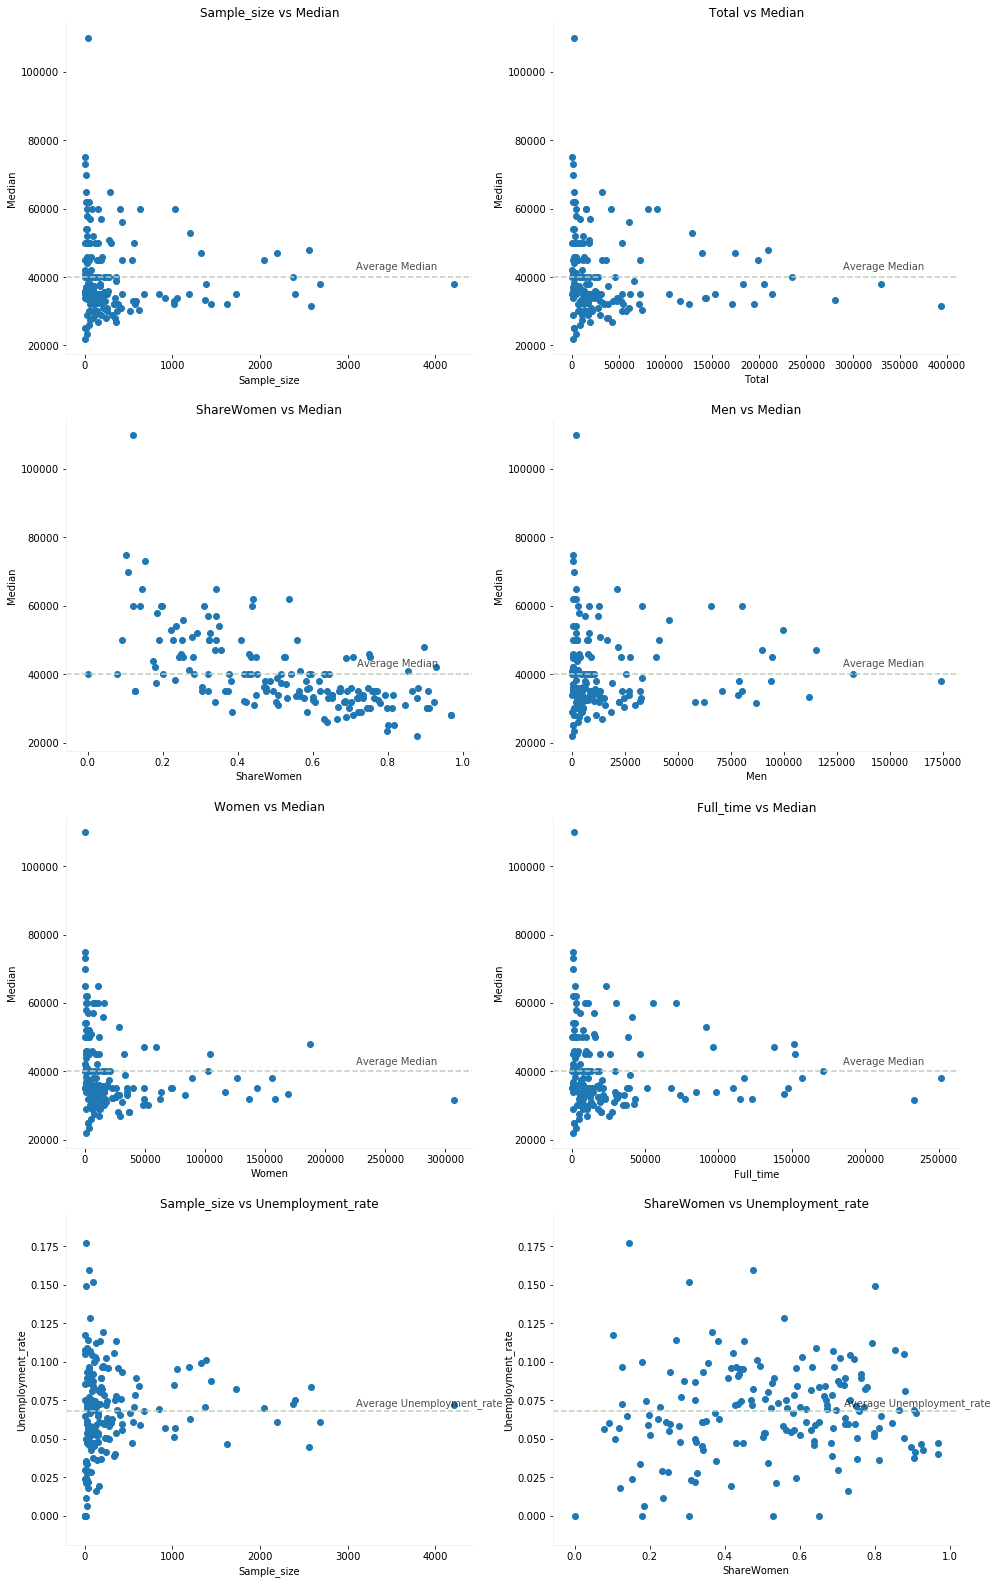

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(16, 28))

x_axis = ['Sample_size', 'Total', 'ShareWomen', 'Men', 'Women', 'Full_time', 'Sample_size', 'ShareWomen']
y_axis = ['Median', 'Median', 'Median', 'Median', 'Median', 'Median', 'Unemployment_rate', 'Unemployment_rate']

axes = axes.ravel() # flatten the array to use in the loop

for k, v in enumerate(zip(x_axis, y_axis)):
    avg = recent_grads[v[1]].mean() # get average of y for annotation
    axes[k].scatter(x=recent_grads[v[0]], y=recent_grads[v[1]])
    x_lim =  axes[k].get_xlim()[1] # get xlim for annotation
    axes[k].axhline(avg, color='#BDCFB5', linestyle='dashed')
    axes[k].text(x=0.7*x_lim, y=(avg+0.05*avg), s='Average '+ v[1], alpha=0.7)
    axes[k].set_title(v[0] + ' vs ' + v[1])
    axes[k].set_xlabel(v[0])
    axes[k].set_ylabel(v[1])
    axes[k].spines['right'].set_visible(False)
    axes[k].spines['top'].set_visible(False)
    axes[k].spines['left'].set_color('#ededed')
    axes[k].spines['bottom'].set_color('#ededed')

plt.show()

The above scatter plots are used within one figure for convenience. I used `Major` as a third dimension within scatter plots, which helps better explain some of our questions.

We can use the above scatter plots to some of our analysis questions:
* *Do students in more popular majors make more money?*
* *Do students that majored in subjects that were majority female make more money?*
* *Is there any link between the number of full-time employees and median salary?*

Below, I also added the correlation of the variables we explored above, to assist in understanding our data better.

In [8]:
# features we are interested
features = ['Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Sample_size', 'Women', 'Total']

# correlation
recent_grads[features].corr()

,Median,Employed,Full_time,ShareWomen,Unemployment_rate,Men,Sample_size,Women,Total
Median,1.000000,-0.104399,-0.079031,-0.618690,-0.115769,0.025991,-0.064475,-0.182842,-0.106738
Employed,-0.104399,1.000000,0.995831,0.147547,0.071374,0.870605,0.964406,0.944037,0.996214
Full_time,-0.079031,0.995831,1.000000,0.120200,0.066616,0.893563,0.978362,0.917681,0.989339
ShareWomen,-0.618690,0.147547,0.120200,1.000000,0.073205,-0.112014,0.097496,0.297832,0.142999
Unemployment_rate,-0.115769,0.071374,0.066616,0.073205,1.000000,0.101502,0.062955,0.059108,0.083192
Men,0.025991,0.870605,0.893563,-0.112014,0.101502,1.000000,0.875176,0.672759,0.878088
Sample_size,-0.064475,0.964406,0.978362,0.097496,0.062955,0.875176,1.000000,0.862606,0.945575
Women,-0.182842,0.944037,0.917681,0.297832,0.059108,0.672759,0.862606,1.000000,0.944764
Total,-0.106738,0.996214,0.989339,0.142999,0.083192,0.878088,0.945575,0.944764,1.000000


To answer *Do students in more popular majors make more money?* we can look at the relationship of total number of students enrolled in a popular major (number of students enrolled indicates popularity, column `Total`) with the `Median` salary of those students. We can observe that the as the number of total students enrolled in a major increase the median salary stays average across the data. Thus, students in more popular majors don't make more money, on average they have a similar median salary as other majors. The correlation table supports this since the correlation is slightly negative.

To answer *Do students that majored in subjects that majority female make more money?* I will look at the relationship of the proportion of majors where women are majority (`ShareWomen`) and their median salary (`Median`) salary. We can observe from the scatter plot as the proportion of women engaged in subjects increases the median salary actually decreases and for some of the majors where women are above 75% the median salary is below average. This shows that students that majored in subjects with majority female actually earn less than average. The correlation plot confirms the observation since the correlation is negative.

To address *Is there any link between the number of full-time employees and median salary?* we ought to look at the scatter plot for `Full_time` and `Median`. We can see from the visual that number of full-time employees increases the median salary stays relatively the same, slightly below average. We can confirm our observation from the correlation table and see that there is almost no correlation between `Full_time` and `Median`.

## Column Distributions

In the following section I will explore the distribution of certain features. This would help us answer the following questions:

* *What percent of majors are predominantly male? Predominantly female?*
* *What's the most common median salary range?*

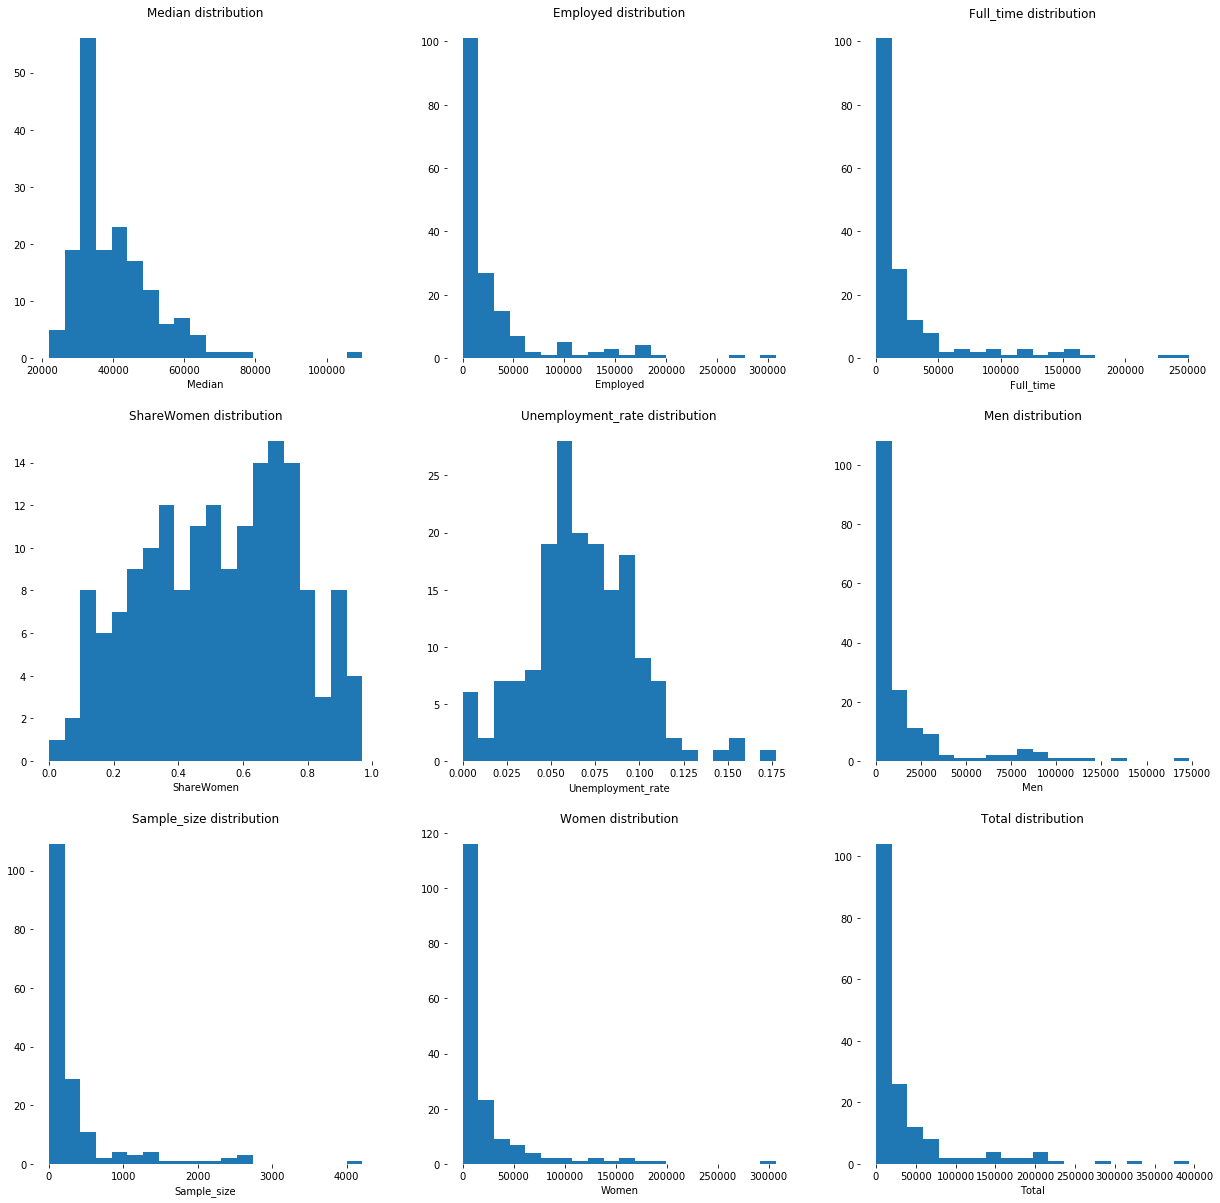

In [9]:
# loop through and generate histogram
fig = plt.figure(figsize=(21, 21))

for k, col in enumerate(features):
    ax = fig.add_subplot(3,3,k+1)
    ax.hist(recent_grads[col], bins=20)
    ax.set_title(col + ' distribution')
    ax.set_xlabel(col)
    for key, spine in ax.spines.items():
        spine.set_visible(False)

The histograms above were made in one figure for convenience purpose. Exploring each one individually with different bins parameters would help us to get a better picture of each features distribution. For the purpose of this analysis, I will use the above histograms to answer the following questions:

* *What percent of majors are predominantly male? Predominantly female?*
* *What's the most common median salary range?*

The *The most common median salary range* is between 20K and 40K per year. We can observe this from the `Median` distribution.

To understand which percent of majors are predominantly male and predominantely female, first we will assume that the dominance criteria here is 50%. Next, we will use the histogram for `ShareWomen` to look at the distribution and find out the percentage based on 0.5 as a border for `ShareWomen`. I will draw another histogram below but this time instead of frequencies I will show percentages.

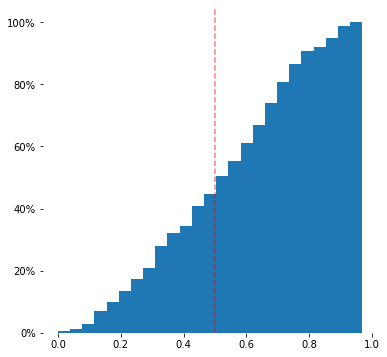

In [10]:
from matplotlib.ticker import PercentFormatter # to format the percentages

share_women = recent_grads['ShareWomen']
plt.figure(figsize=(6, 6))
plt.hist(share_women, bins=25, weights=np.ones(len(share_women)) / len(share_women),cumulative=True)
plt.axvline(x=0.5, color='red', alpha=0.5, linestyle='dashed')
plt.box(on=None)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

From this plot we can observe that roughly around 43-44% of majors are predominantly male and the other remaining are predominantly female. To bre more precise we can easily calculate the proportion using the code below.

In [11]:
# percent
male_dominant = recent_grads[recent_grads['ShareWomen'] < 0.5].shape[0] / recent_grads.shape[0]
print("{:.2%} of majors is predominantly male and {:.2%} is female".format(male_dominant, 1-male_dominant))

44.19% of majors is predominantly male and 55.81% is female


## Scatter Matrices

Scatter plots enable us to understand the relationship between two or three variables. Histograms are useful when exploring distribution of features is useful for analysis. Scatter matrix plots present us with the best of two worlds. In this section I will use scatter matrices to explore further the dataset.

I will create two scatter matrix plots:
* `Sample_size` and `Median`
* `Sample_size`, `Median` and `Unemployment rate`

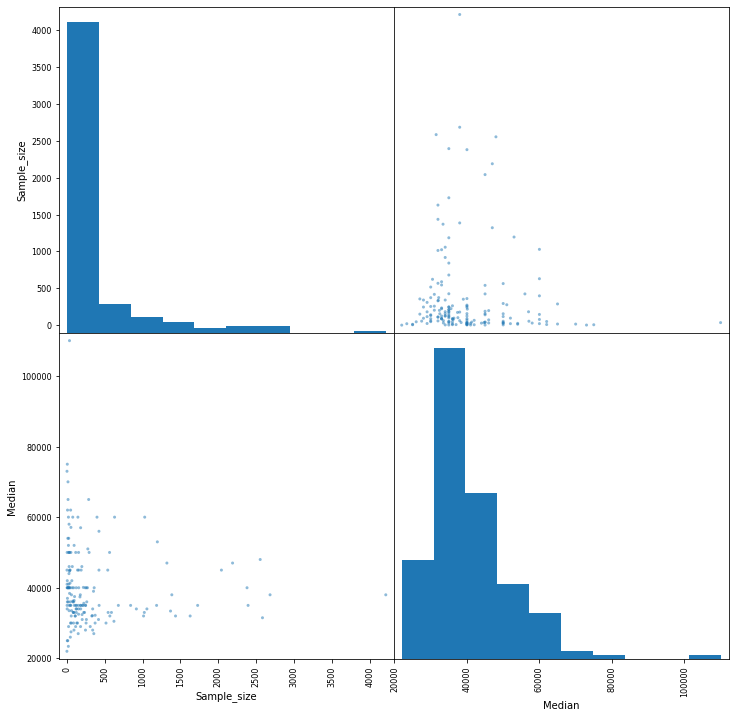

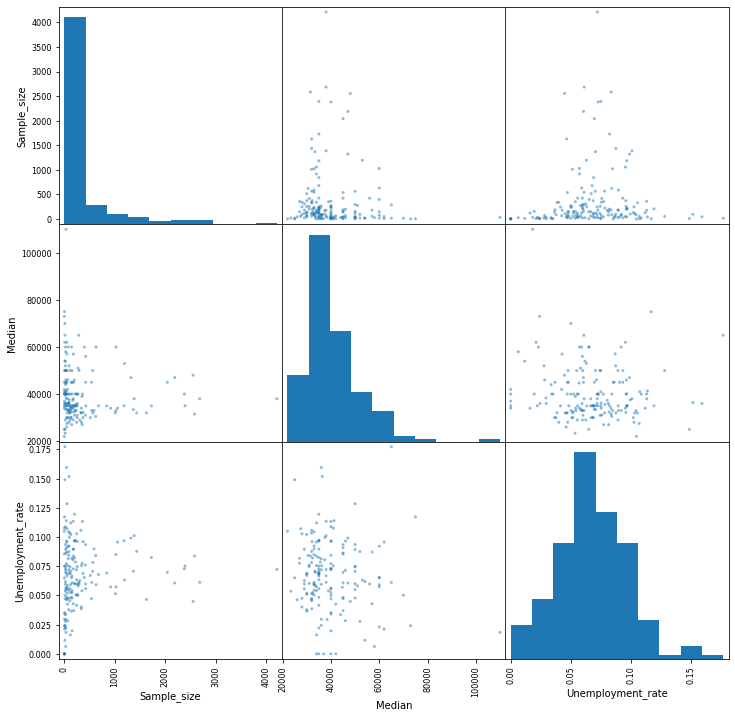

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(12, 12), label="Demo")
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(12, 12))
plt.show()

We can observe that the combination of histograms and scatter plots might not be as useful as it seems from the first look. To answer the questions our analysis set out to, its important to first understand what features we need and then what visual will help us. In the above sections some of the questions we were able to answer using either histograms or scatter plots. 

This is the end of the exploratory data analysis aimed at understanding students job outcomes. This project was developed as part of the guided projects series of dataquest. All of the code and analysis belongs to me with a great guidance from dataquest. 